# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1116ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1116_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,7.188,54.4019,0.00276
1,7.005,53.0444,0.00269
2,6.842,51.8206,0.00263
3,6.624,50.2045,0.00255
4,6.454,48.6458,0.00247


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [7.188, 7.005, 6.842, 6.624, 6.454, 6.256, 6.115, 5.932, 5.776, 5.564, 5.409, 5.247, 5.049, 4.865, 4.71, 4.526, 4.399, 4.202, 4.06, 3.884, 3.721, 3.552, 3.34, 2.973, 2.966, 2.959, 2.93, 2.945, 2.93, 2.923, 2.902, 2.916, 2.902, 2.888, 2.888, 2.86, 2.86, 2.846, 2.86, 2.832, 2.817, 2.295, 0.099, 0.106, 0.092, 0.113, 0.106, 0.106, 0.092, 0.099, 0.113, -2.683, -2.697, -2.697, -2.712, -2.697, -2.726, -2.726, -2.74, -2.74, -2.775, -3.051, -3.276, -3.453, -3.63, -3.813, -3.954, -4.152, -4.336, -4.512, -4.703, -4.872, -5.07, -5.247, -5.451, -5.621, -5.819, -6.037, -6.242, -6.433, -6.616, -6.814, -7.019, -7.224, -7.45, -7.683, -7.888, -8.015, -7.647, -7.316, -6.97, -6.659, -6.391, -6.045, -5.769, -5.423, -5.155, -4.844, -4.548, -4.265, -4.011, -3.757, -3.46, -3.093, -2.81, -2.81, -2.768, -2.782, -2.754, -2.754, -2.74, -2.726, -2.712, -2.697, -2.655, 0.035, 0.028, 0.042, 0.028, 0.042, 0.035, 2.267, 2.846, 2.846, 2.86, 2.888, 2.888, 3.262, 3.559, 3.848, 4.103, 4.357, 4.625, 4.901, 5.232, 5.46

In [5]:
lower_limit = V.index(0.035) + 5
upper_limit = V.index(5.465)

print(lower_limit)
print(upper_limit)

120
135


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.035 2.267 2.846 2.846 2.86  2.888 2.888 3.262 3.559 3.848 4.103 4.357
 4.625 4.901 5.232]
I =  [ 9.8567 11.7961 13.4968 15.735  17.467  19.7946 21.5096 23.9306 25.9239
 28.0407 30.0647 32.6427 34.6926 37.0222 38.9719]


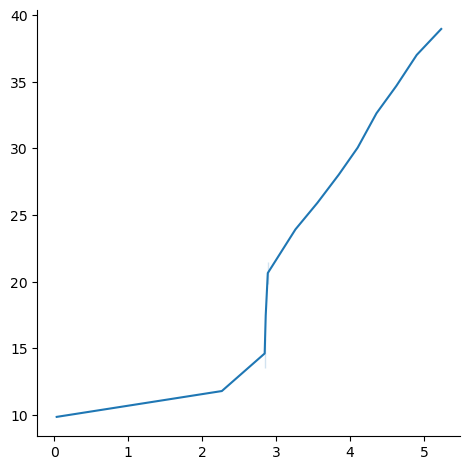

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

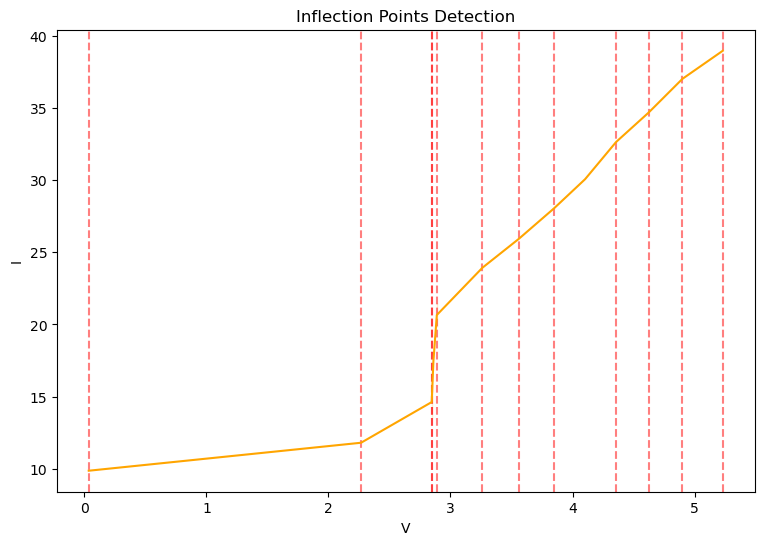

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

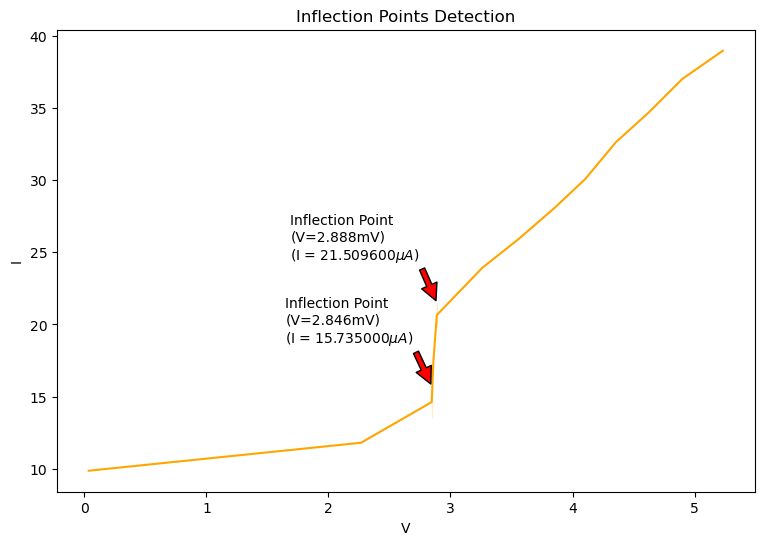

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [2, 4]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[7.188, 7.005, 6.842, 6.624, 6.454, 6.256, 6.115, 5.932, 5.776, 5.564, 5.409, 5.247, 5.049, 4.865, 4.71, 4.526, 4.399, 4.202, 4.06, 3.884, 3.721, 3.552, 3.34, 2.973, 2.966, 2.959, 2.93, 2.945, 2.93, 2.923, 2.902, 2.916, 2.902, 2.888, 2.888, 2.86, 2.86, 2.846, 2.86, 2.832, 2.817, 2.295, 0.099, 0.106, 0.092, 0.113, 0.106, 0.106, 0.092, 0.099, 0.113, -2.683, -2.697, -2.697, -2.712, -2.697, -2.726, -2.726, -2.74, -2.74, -2.775, -3.051, -3.276, -3.453, -3.63, -3.813, -3.954, -4.152, -4.336, -4.512, -4.703, -4.872, -5.07, -5.247, -5.451, -5.621, -5.819, -6.037, -6.242, -6.433, -6.616, -6.814, -7.019, -7.224, -7.45, -7.683, -7.888, -8.015, -7.647, -7.316, -6.97, -6.659, -6.391, -6.045, -5.769, -5.423, -5.155, -4.844, -4.548, -4.265, -4.011, -3.757, -3.46, -3.093, -2.81, -2.81, -2.768, -2.782, -2.754, -2.754, -2.74, -2.726, -2.712, -2.697, -2.655, 0.035, 0.028, 0.042, 0.028, 0.042, 0.035, 2.267, 2.846, 2.846, 2.86, 2.888, 2.888, 3.262, 3.559, 3.848, 4.103, 4.357, 4.625, 4.901, 5.232, 5.465, 5.

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

low_limit = find_last_occurrence(2.888, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0].max())

print(low_limit) 
print(up_limit)

126
145


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.888 3.262 3.559 3.848 4.103 4.357 4.625 4.901 5.232 5.465 5.762 6.073
 6.32  6.638 6.955 7.245 7.549 7.873 8.177]
[21.5096 23.9306 25.9239 28.0407 30.0647 32.6427 34.6926 37.0222 38.9719
 41.5819 43.8419 46.0617 48.5162 50.826  53.0881 55.3461 57.8094 60.2645
 62.7975]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.0102))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 17.0126006
    reduced chi-square = 1.00074121
    Akaike info crit   = 1.90079071
    Bayesian info crit = 3.78966867
    R-squared          = 1.00000000
[[Variables]]
    slope:      7889.77548 +/- 58.4647830 (0.74%) (init = 7926.318)
    intercept: -1816909.29 +/- 278100.610 (15.31%) (init = -1999975)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9535


## Plot the model

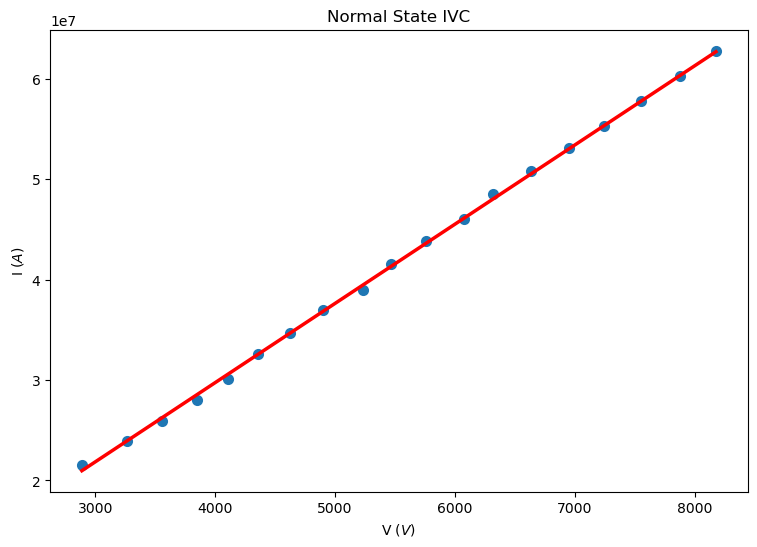

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7889.775481742141, 'intercept': -1816909.2866716855}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000127 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.82421236 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.82421236 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.7115230841831587e-22 J
Gap Energy = 5.423046168366317e-22 J
Gap Voltage = 3.384749824220645 mV
Josephson Current = 20.270262647972203 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.149243267411006e-22 J
Gap Energy =  4.298486534822012e-22 J
Gap Voltage = 2.682865144689809 mV
Josephson Current = 15.355458610784263 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[5], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[2], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 21.5096, 'Ic_weak': 20.2703, 'Ic_strong': 15.3555, 'V_gap': 2.846, 'Vg_weak': 3.3847, 'Vg_strong': 2.6829, 'Temp': 4.8242}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>